<a href="https://colab.research.google.com/github/lintangiqhtiar/rec-sys-based-llm/blob/main/Fishbone_diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

import matplotlib.pyplot as plt

from matplotlib.patches import Polygon, Wedge


In [ ]:
def problems(data: str,
             problem_x: float, problem_y: float,
             angle_x: float, angle_y: float):
    """
    Draw each problem section of the Ishikawa plot.

    Parameters
    ----------
    data : str
        The name of the problem category.
    problem_x, problem_y : float, optional
        The `X` and `Y` positions of the problem arrows (`Y` defaults to zero).
    angle_x, angle_y : float, optional
        The angle of the problem annotations. They are always angled towards
        the tail of the plot.

    Returns
    -------
    None.

    """
    ax.annotate(str.upper(data), xy=(problem_x, problem_y),
                xytext=(angle_x, angle_y),
                fontsize=10,
                color='white',
                weight='bold',
                xycoords='data',
                verticalalignment='center',
                horizontalalignment='center',
                textcoords='offset fontsize',
                arrowprops=dict(arrowstyle="->", facecolor='black'),
                bbox=dict(boxstyle='square',
                          facecolor='tab:blue',
                          pad=0.8))


def causes(data: list,
           cause_x: float, cause_y: float,
           cause_xytext=(-9, -0.3), top: bool = True):
    """
    Place each cause to a position relative to the problems
    annotations.

    Parameters
    ----------
    data : indexable object
        The input data. IndexError is
        raised if more than six arguments are passed.
    cause_x, cause_y : float
        The `X` and `Y` position of the cause annotations.
    cause_xytext : tuple, optional
        Adjust to set the distance of the cause text from the problem
        arrow in fontsize units.
    top : bool, default: True
        Determines whether the next cause annotation will be
        plotted above or below the previous one.

    Returns
    -------
    None.

    """
    for index, cause in enumerate(data):
        # [<x pos>, <y pos>]
        coords = [[0.02, 0],
                  [0.23, 0.5],
                  [-0.46, -1],
                  [0.69, 1.5],
                  [-0.92, -2],
                  [1.15, 2.5]]

        # First 'cause' annotation is placed in the middle of the 'problems' arrow
        # and each subsequent cause is plotted above or below it in succession.
        cause_x -= coords[index][0]
        cause_y += coords[index][1] if top else -coords[index][1]

        ax.annotate(cause, xy=(cause_x, cause_y),
                    horizontalalignment='center',
                    xytext=cause_xytext,
                    fontsize=9,
                    xycoords='data',
                    textcoords='offset fontsize',
                    arrowprops=dict(arrowstyle="->",
                                    facecolor='black'))


def draw_body(data: dict):
    """
    Place each problem section in its correct place by changing
    the coordinates on each loop.

    Parameters
    ----------
    data : dict
        The input data (can be a dict of lists or tuples). ValueError
        is raised if more than six arguments are passed.

    Returns
    -------
    None.

    """
    # Set the length of the spine according to the number of 'problem' categories.
    length = (math.ceil(len(data) / 2)) - 1
    draw_spine(-2 - length, 2 + length)

    # Change the coordinates of the 'problem' annotations after each one is rendered.
    offset = 0
    prob_section = [1.55, 0.8]
    for index, problem in enumerate(data.values()):
        plot_above = index % 2 == 0
        cause_arrow_y = 1.7 if plot_above else -1.7
        y_prob_angle = 16 if plot_above else -16

        # Plot each section in pairs along the main spine.
        prob_arrow_x = prob_section[0] + length + offset
        cause_arrow_x = prob_section[1] + length + offset
        if not plot_above:
            offset -= 2.5
        if index > 5:
            raise ValueError(f'Maximum number of problems is 6, you have entered '
                             f'{len(data)}')

        problems(list(data.keys())[index], prob_arrow_x, 0, -12, y_prob_angle)
        causes(problem, cause_arrow_x, cause_arrow_y, top=plot_above)


def draw_spine(xmin: int, xmax: int):
    """
    Draw main spine, head and tail.

    Parameters
    ----------
    xmin : int
        The default position of the head of the spine's
        x-coordinate.
    xmax : int
        The default position of the tail of the spine's
        x-coordinate.

    Returns
    -------
    None.

    """
    # draw main spine
    ax.plot([xmin - 0.1, xmax], [0, 0], color='tab:blue', linewidth=2)
    # draw fish head
    ax.text(xmax + 0.1, - 0.05, 'PROBLEM', fontsize=10,
            weight='bold', color='white')
    semicircle = Wedge((xmax, 0), 1, 270, 90, fc='tab:blue')
    ax.add_patch(semicircle)
    # draw fish tail
    tail_pos = [[xmin - 0.8, 0.8], [xmin - 0.8, -0.8], [xmin, -0.01]]
    triangle = Polygon(tail_pos, fc='tab:blue')
    ax.add_patch(triangle)



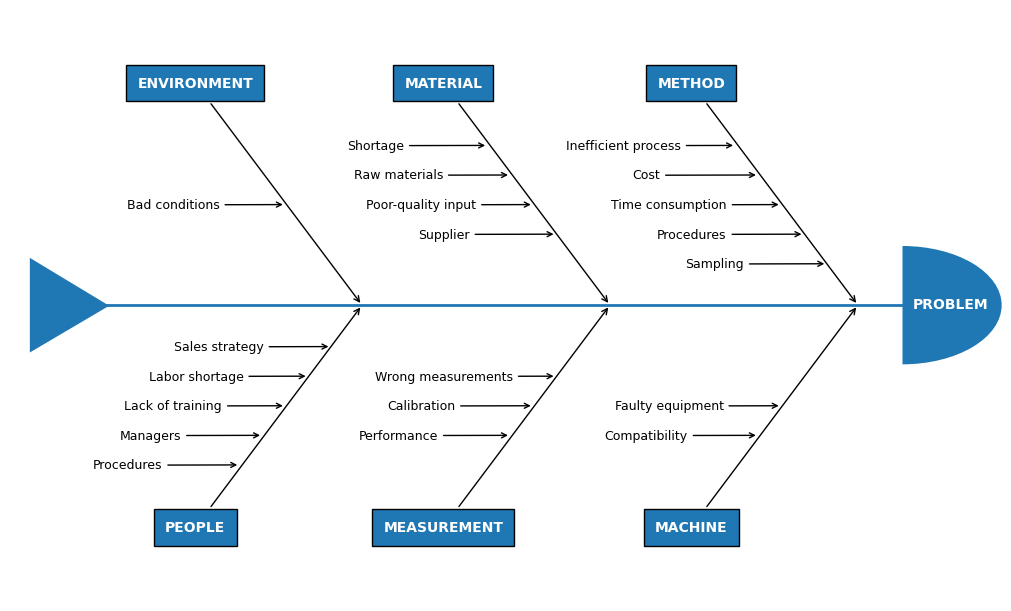

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis('off')


# Input data
categories = {
    'Method': ['Time consumption', 'Cost', 'Procedures', 'Inefficient process',
               'Sampling'],
    'Machine': ['Faulty equipment', 'Compatibility'],
    'Material': ['Poor-quality input', 'Raw materials', 'Supplier',
                 'Shortage'],
    'Measurement': ['Calibration', 'Performance', 'Wrong measurements'],
    'Environment': ['Bad conditions'],
    'People': ['Lack of training', 'Managers', 'Labor shortage',
               'Procedures', 'Sales strategy']
}

draw_body(categories)
plt.show()

In [ ]:
import pandas as pd

In [ ]:
#import file json
import json

In [ ]:
#input file json
with open('/content/drive/MyDrive/SKRIPSI/data/hasil_topik1.json') as f:
  data = json.load(f)

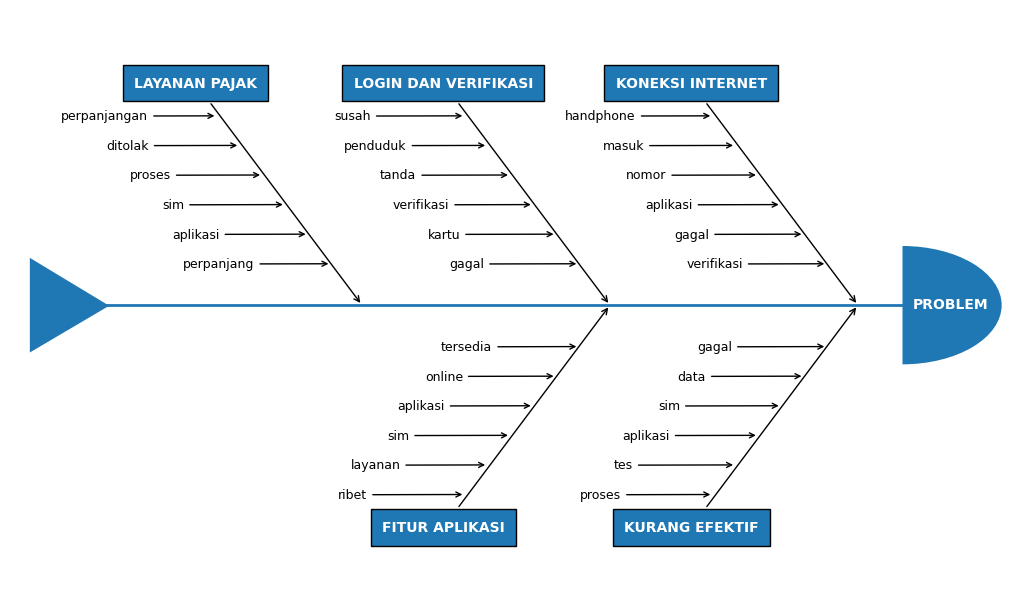

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis('off')


# Input data
categories = data
draw_body(categories)
plt.show()